## Student Alcohol Consumption Dataset

#### Source: 
* *Fabio Pagnotta*, *Hossain Mohammad Amran*.
* **Email:** fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain@studenti.unicam.it
* *University Of Camerino*


### 0.- Libraries needed 

In [11]:
# install.packages("rminer", repos = "http://cran.us.r-project.org") #run it once to install missing libraries
library(party)  # needed for trees
library(rminer) # used in paper reference

### 1.- Load & Prepare Data Sets 
First step is to load and merge data from maths and portuguese data sets.

In [45]:
# Load maths data set
math = read.table("student-mat.csv", sep=";", header=TRUE)
port = read.table("student-por.csv", sep=";", header=TRUE)

# Clean it up
math = na.omit(math)
port = na.omit(port)

# Create two new columns one indication the overall weekly alcohol 
# consumption and the other one indicating if student approved or 
# not the subject 
math$alcohol = (math$Dalc*5) + (math$Walc*2)
math$passed = ifelse(math$G3 > 9, "pass" , "fail")
port$alcohol = (port$Dalc*5) + (port$Walc*2)
port$passed = ifelse(port$G3 > 9, "pass" , "fail")

# Join Data Sets
# all <- rbind(math, port)


	 Conditional inference tree with 3 terminal nodes

Response:  G3 
Inputs:  studytime, alcohol, Pstatus, romantic, Mjob, Fjob, Medu, Fedu, paid, failures, traveltime, age 
Number of observations:  395 

1) failures <= 0; criterion = 1, statistic = 51.18
  2) Mjob == {health, services}; criterion = 0.965, statistic = 16.054
    3)*  weights = 102 
  2) Mjob == {at_home, other, teacher}
    4)*  weights = 210 
1) failures > 0
  5)*  weights = 83 


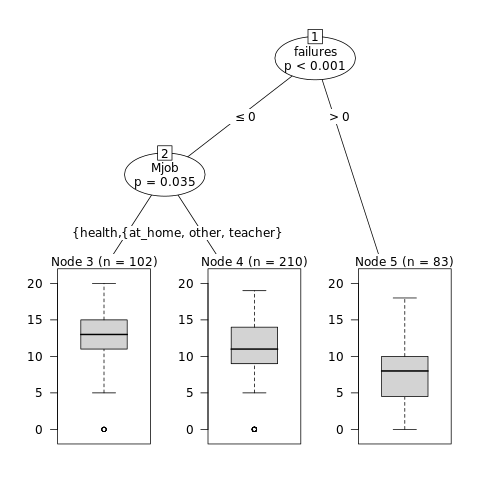

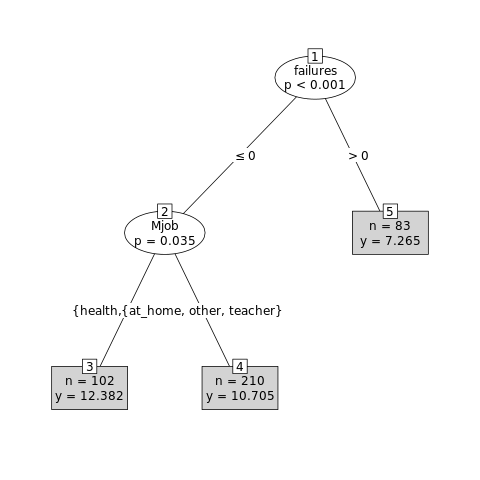

In [43]:
# Simple Decision Tree to see basic paths
math.tree <- ctree( G3 ~ studytime + alcohol + Pstatus
    + romantic + Mjob + Fjob + Medu + Fedu
    + paid + failures + traveltime + age, data =  math)

# Print tree decisions
print(math.tree)
# Default view of tree
plot(math.tree)
# Another simple view of the tree
plot(math.tree, type="simple")

In [8]:
port = read.table("student-por.csv", sep=";", header=TRUE)
port = na.omit(port)
print(nrow(port))
port.tree <- ctree(G3 ~ studytime + romantic + Dalc + Walc, data = port)
plot(port.tree)

[1] 649


ERROR: Error in eval(expr, envir, enclos): could not find function "ctree"


ERROR: Error in plot(port.tree): object 'port.tree' not found


In [44]:
# K <- c("kfold",10) # 10-fold cross-validation
# execute 10 runs of a DT classification:
# DT <- mining(y~.,math,model="dt",Runs=20,method=K)
# show mean classification error on test set:
# print(mean(DT$error))
# save the results (predictions, ...):
# saveMining(DT,"DT-results")

#### 1.1.- Select relevant attributes  
In this work we decided to use only few arguments for the first round analysis, in the future more attributes could be taken in count to enrich the analysis.

In [14]:
# TO - DO
# data = subset(all, select = c("sex","famsize","Pstatus","studytime","romantic","Dalc","Walc","G3"))